<a href="https://colab.research.google.com/github/Noumzz/RoadTurnsDetection/blob/main/RoadTurnDetctionYolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install YOLOv5 dependencies
!git clone https://github.com/ultralytics/yolov5  # clone YOLOv5 repository
%cd yolov5
!pip install -r requirements.txt  # install requirements



Cloning into 'yolov5'...
remote: Enumerating objects: 17045, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17045 (delta 10), reused 18 (delta 8), pack-reused 17022 (from 1)
Receiving objects: 100% (17045/17045), 15.67 MiB | 13.72 MiB/s, done.
Resolving deltas: 100% (11704/11704), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 52.1 MB/s eta 0:00:00


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="GeOeNPP8KTNPD1ypENyL")
project = rf.workspace("nouman-qrong").project("roaddirection")
version = project.version(1)
dataset = version.download("yolov5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to RoadDirection-1 in yolov5pytorch:: 100%|██████████| 252/252 [00:00<00:00, 6139.54it/s]


In [3]:
# Start training YOLOv5
!python train.py --img 640 --batch 32 --epochs 150 --data /content/yolov5/RoadDirection-1/data.yaml --weights yolov5s.pt --project RoadTurnsDetectionr --name yolov5_model


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-11-10 15:01:01.371539: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-10 15:01:01.391234: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-10 15:01:01.397318: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to regi

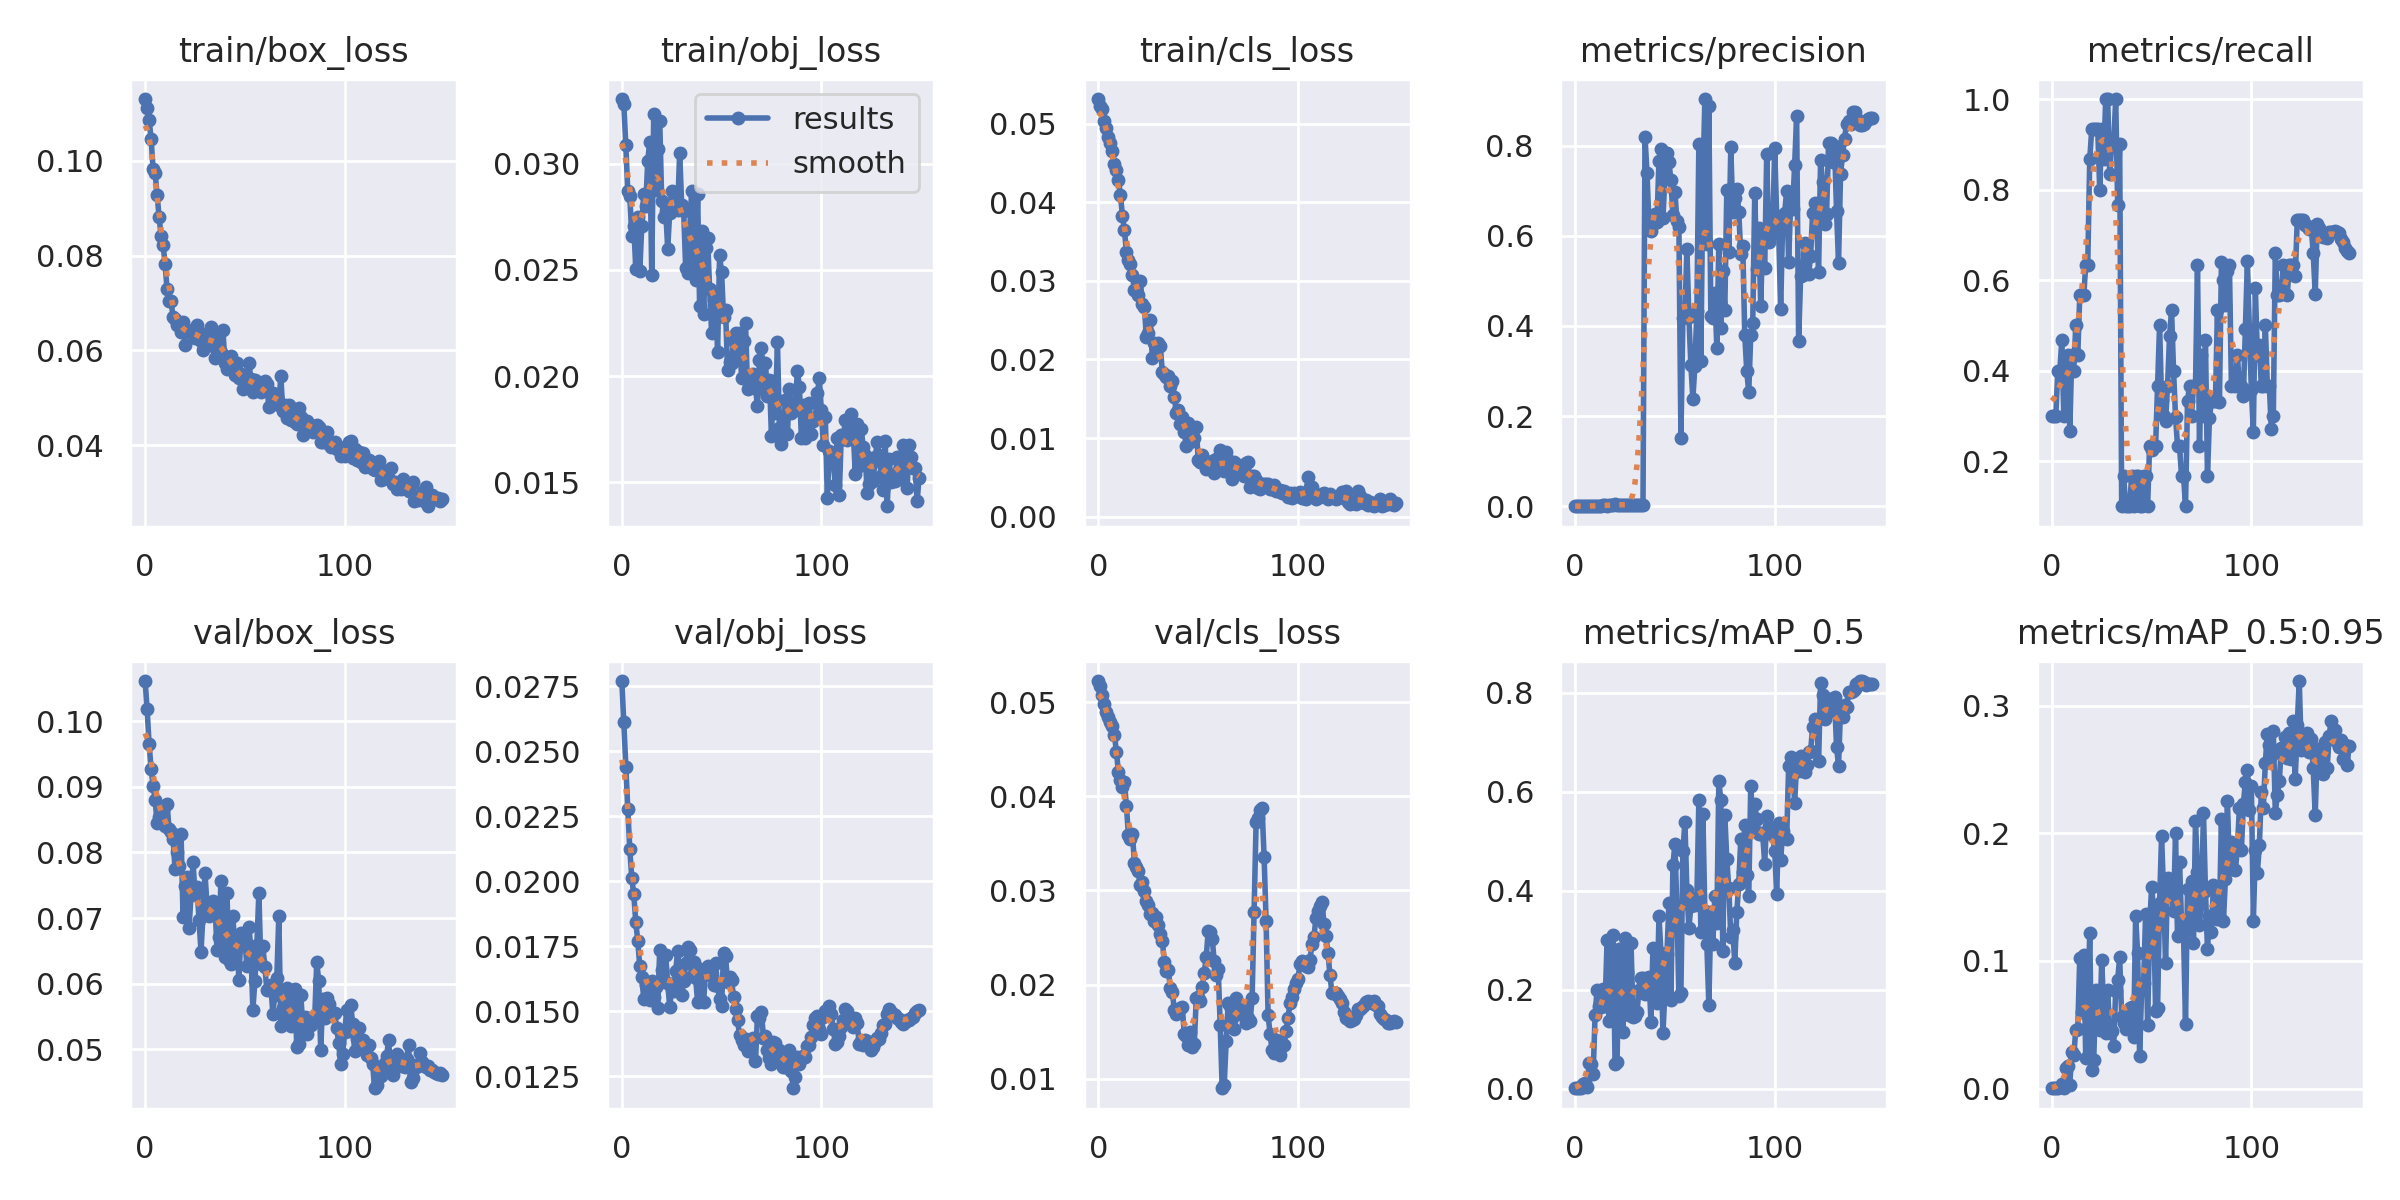

In [9]:
from IPython.display import Image
display(Image(filename='/content/yolov5/RoadTurnsDetectionr/yolov5_model/results.png'))


In [15]:
!python val.py --weights /content/yolov5/RoadTurnsDetectionr/yolov5_model/weights/best.pt --data /content/yolov5/RoadDirection-1/data.yaml --img 640


val: data=/content/yolov5/RoadDirection-1/data.yaml, weights=['/content/yolov5/RoadTurnsDetectionr/yolov5_model/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolov5/RoadDirection-1/valid/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100% 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:01<00:00,  1.11s/it]
                   all         12         12      0.721      0.733      0.795       0.32
                  Left         12          3      0.495   

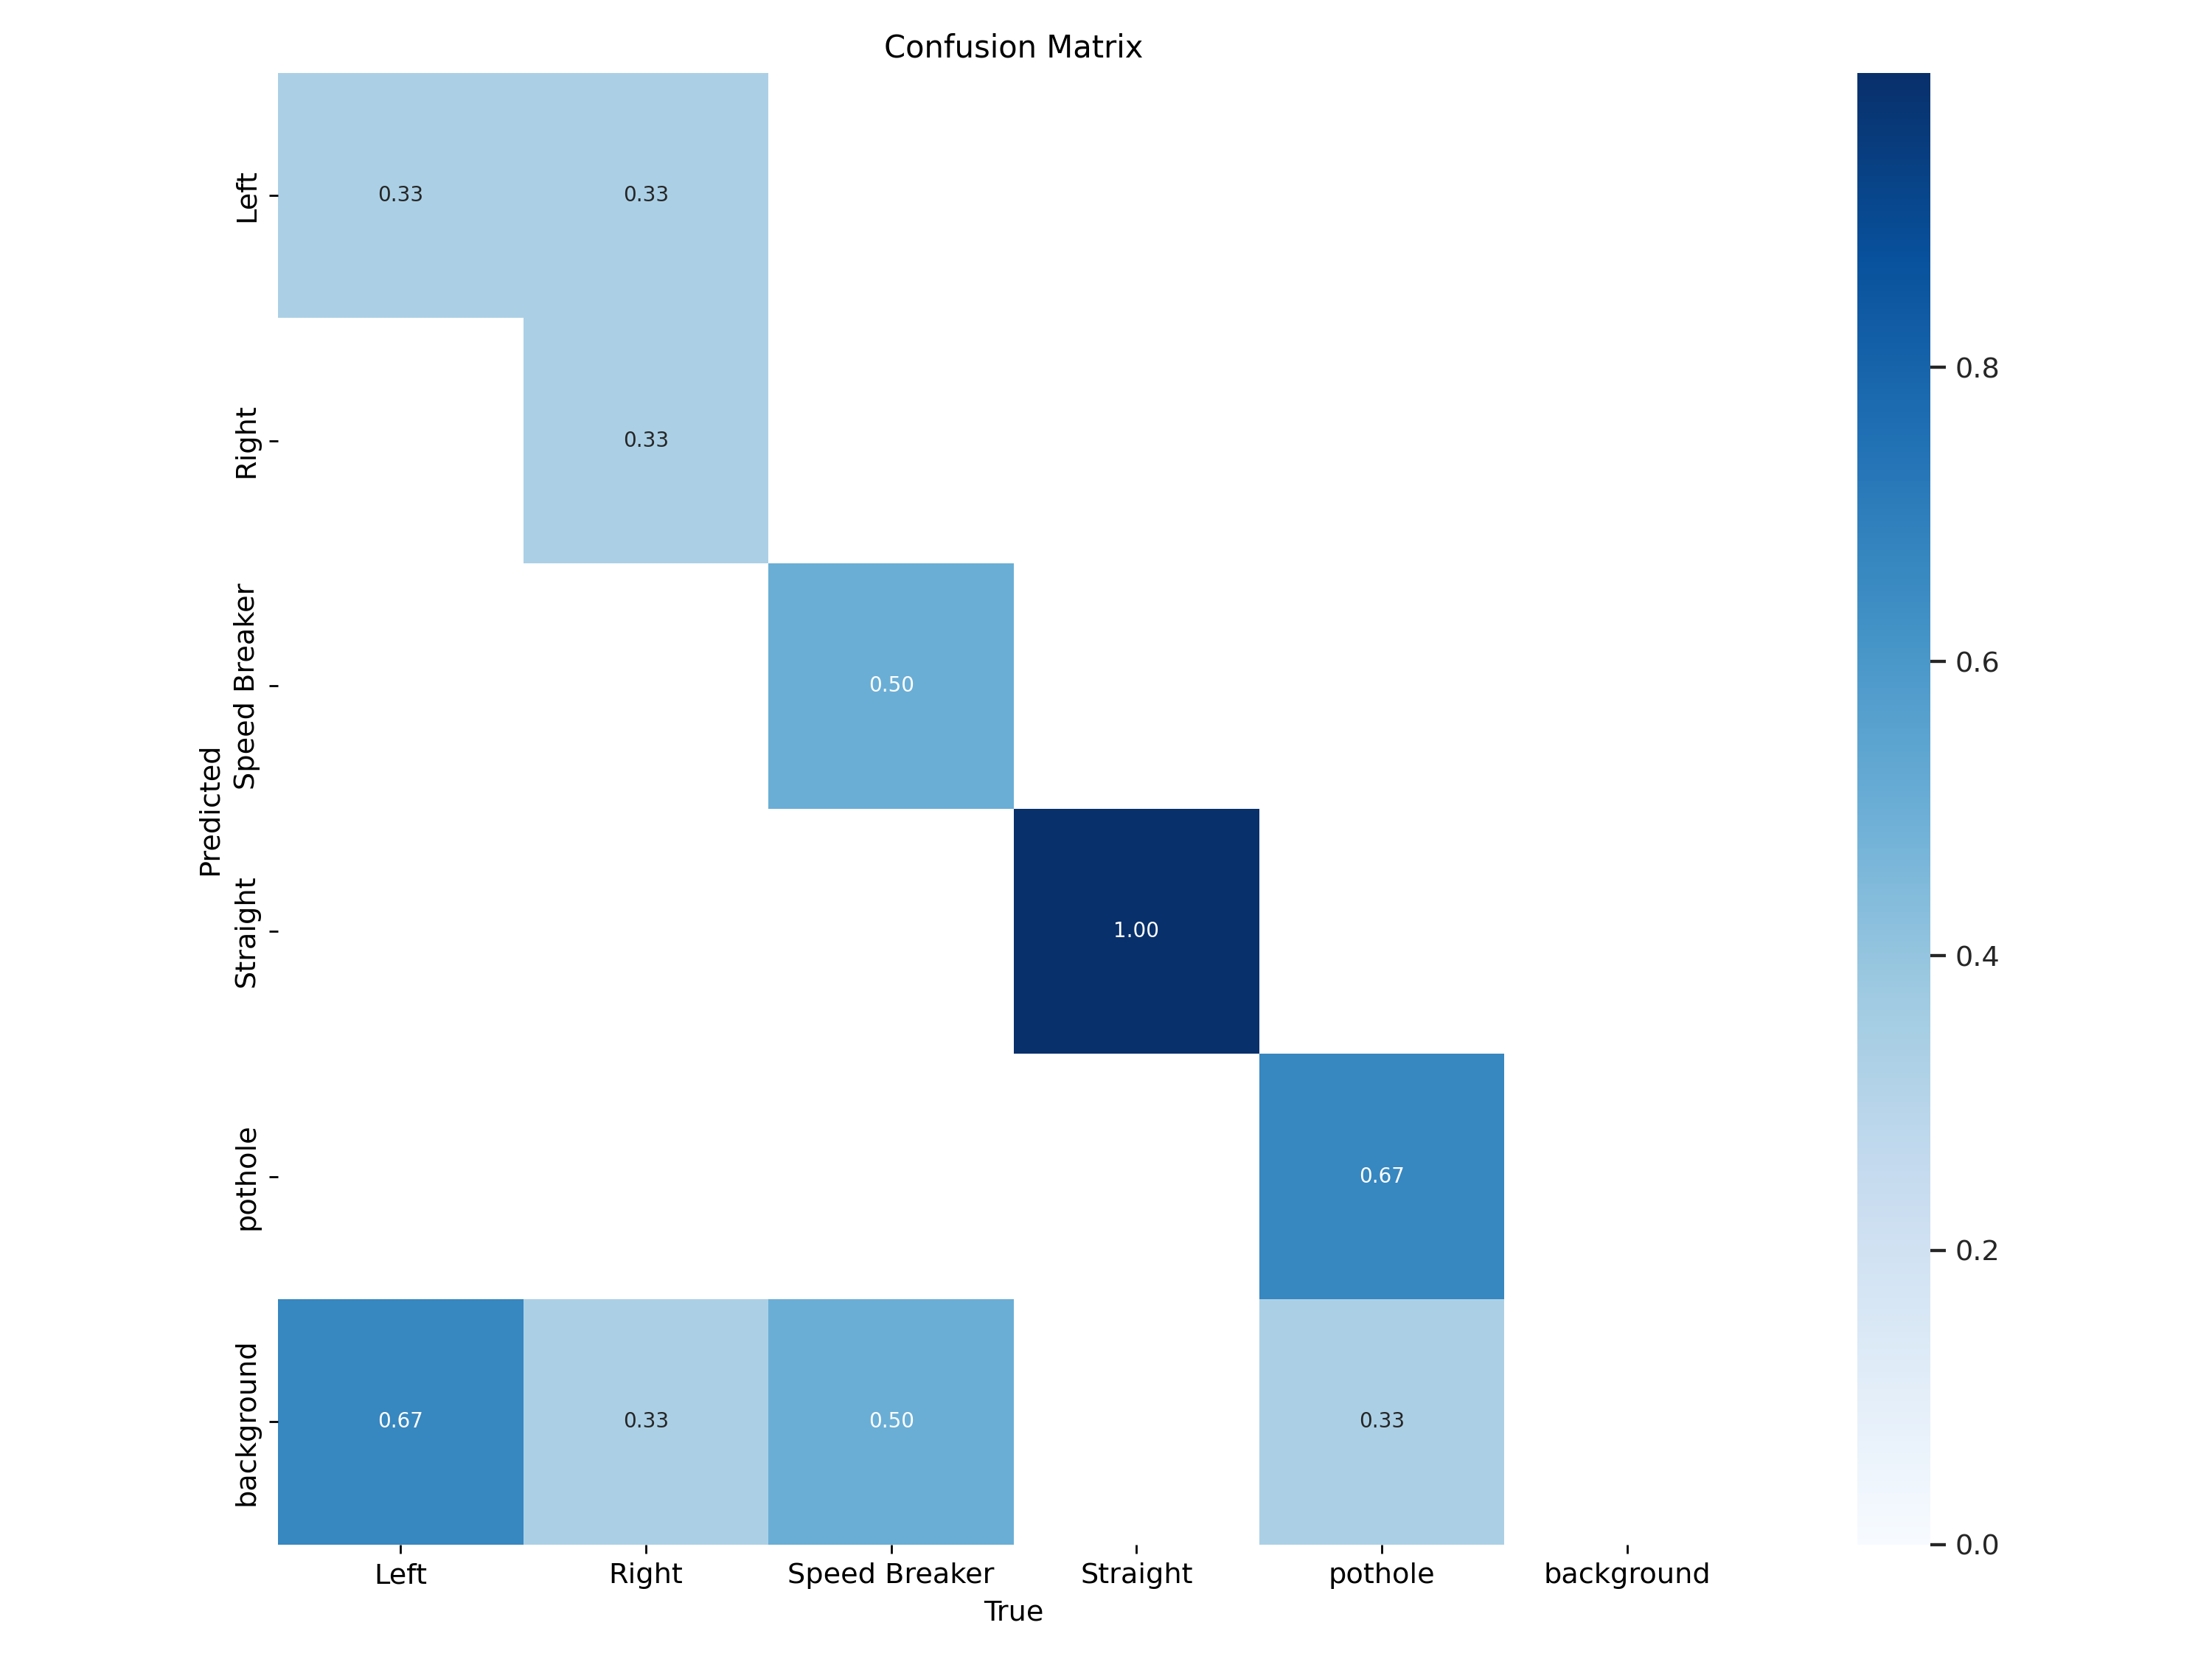

In [14]:
from IPython.display import Image, display

# Display the updated confusion matrix
display(Image(filename='/content/yolov5/RoadTurnsDetectionr/yolov5_model/confusion_matrix.png'))


In [5]:
# Run detection with your trained model on the test images
!python detect.py --weights /content/yolov5/RoadTurnsDetectionr/yolov5_model/weights/best.pt \
                  --source /content/yolov5/RoadDirection-1/test/images \
                  --img 640 --conf 0.15 --save-txt --save-conf


detect: weights=['/content/yolov5/RoadTurnsDetectionr/yolov5_model/weights/best.pt'], source=/content/yolov5/RoadDirection-1/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.15, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/18 /content/yolov5/RoadDirection-1/test/images/B20_png.rf.844ce5b061ea3b9d815df4d6b4c271c1.jpg: 640x640 1 Speed Breaker, 11.4ms
image 2/18 /content/yolov5/RoadDirection-1/test/images/B2_png.rf.b5e1a2a81fb8817

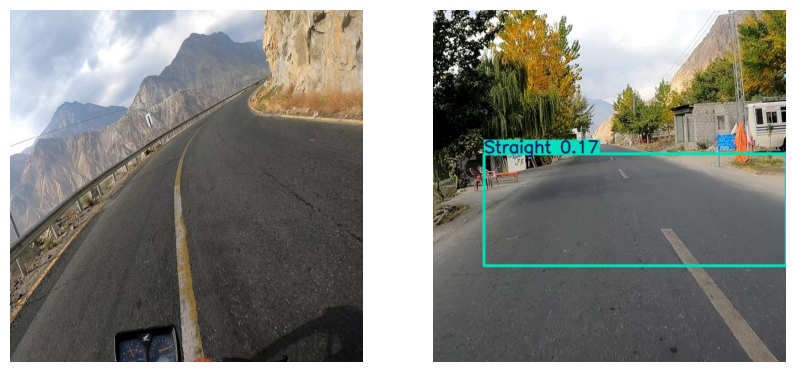

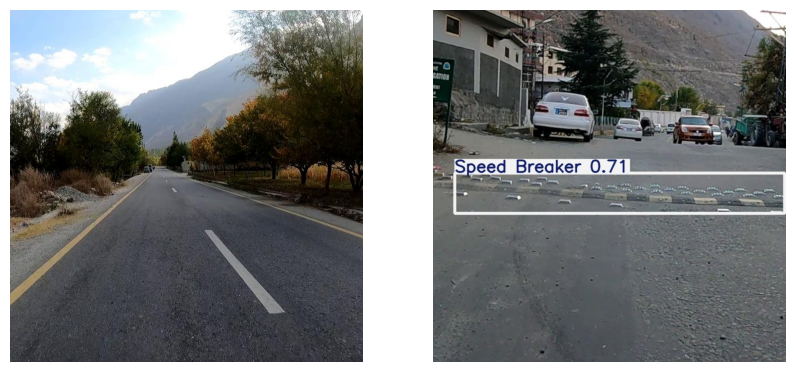

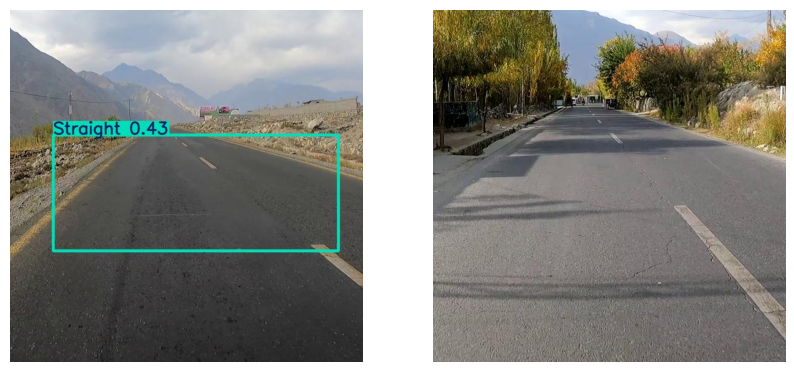

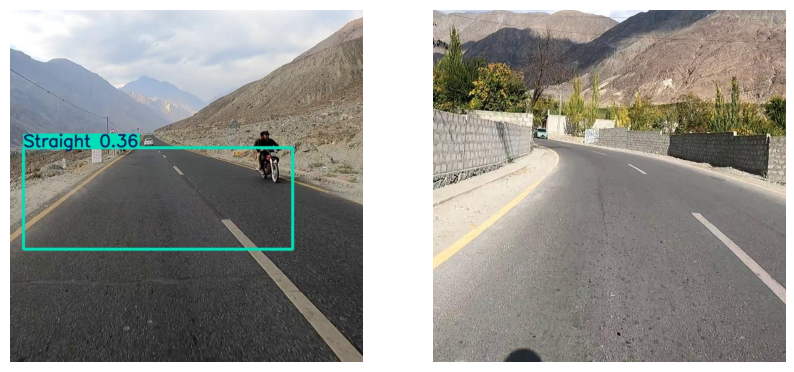

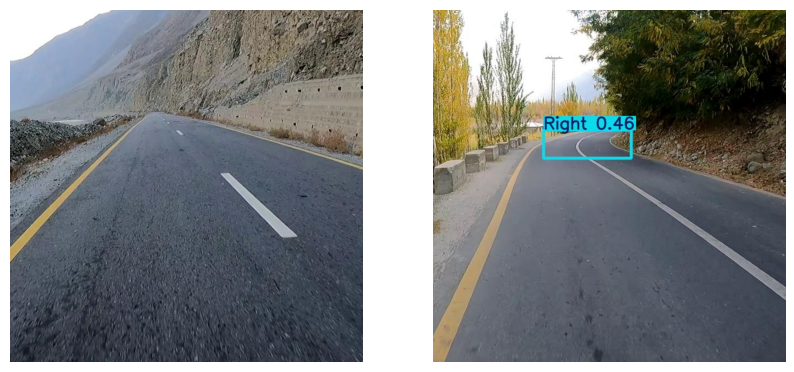

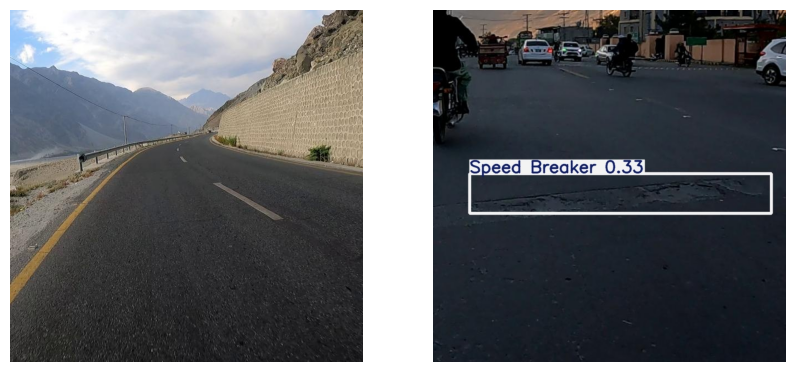

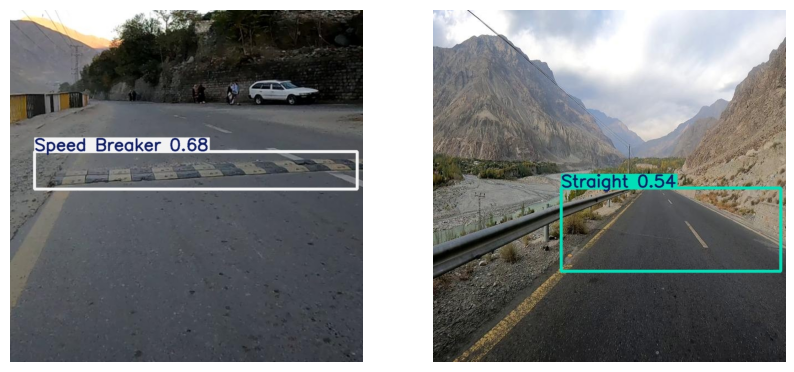

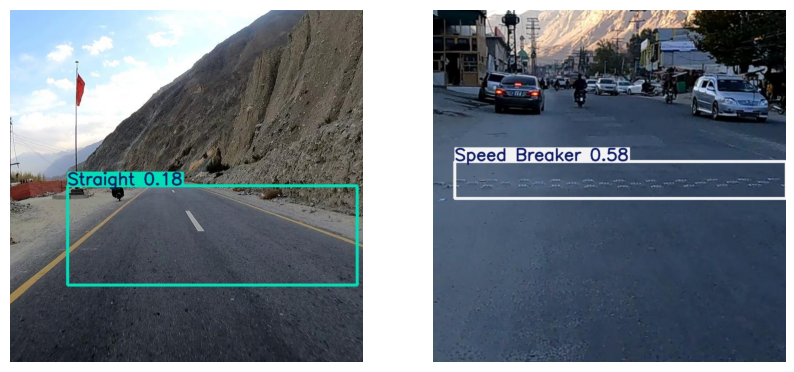

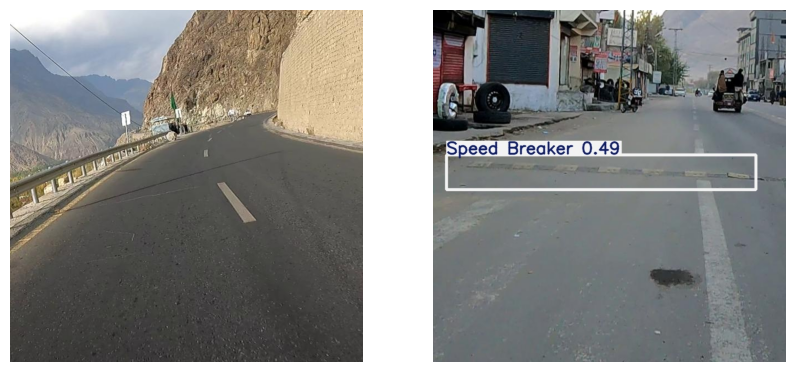

In [8]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Directory where annotated images are saved
results_dir = '/content/yolov5/runs/detect/exp2/'

# Gather all image file paths
image_files = [os.path.join(results_dir, img) for img in os.listdir(results_dir) if img.endswith((".jpg", ".png"))]

# Display images in a 2-per-row grid
for i in range(0, len(image_files), 2):
    plt.figure(figsize=(10, 5))
    for j, img_file in enumerate(image_files[i:i+2]):
        img = Image.open(img_file)
        plt.subplot(1, 2, j+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()
